## Création de votre premier réseau de neurones

Ce notebook permet de créer un premier réseau de neurone qui va classifier des données regroupées de différentes façon en s'inspirant de https://playground.tensorflow.org  
Entrainez-vous sur cette page dans un premier temps puis attaquez le code.


Le code ci-dessous est le code Python permettant de créer votre réseau avec 2 populations séparées (Gaussian)

In [2]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys
import random as rd

def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

## Création des données d'entrainement

In [2]:
datas = []
labels = []
nbr_points = 10000

abs1 = np.random.normal(-2,.75,nbr_points)
ord1 = np.random.normal(-2,.75,nbr_points)
labels1 = np.zeros(nbr_points)                 # on attendra [1,0] en sortie pour ces données

abs2 = np.random.normal(2,.75,nbr_points)
ord2 = np.random.normal(2,.75,nbr_points)
labels2 = np.zeros(nbr_points) + 1          # on attendra [0,1] en sortie pour ces données

abss = list([abs1,abs2])
abss = np.array(abss).ravel()

ords = list([ord1,ord2])
ords = np.array(ords).ravel()

labels = list([labels1,labels2])
labels = np.array(labels).ravel()


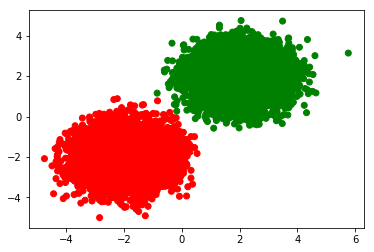

In [3]:
c = ['red','green']
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.show()

In [4]:
datas = np.array([[abss[i],ords[i]] for i in range(2*nbr_points)])
len(datas)
datas_df = np.array([list(data)+[color] for (data,color) in zip(datas, colors)])

In [5]:
list(datas[0])+[labels[0]]

[-2.641290618531951, -0.5077106044126949, 0.0]

In [6]:
df = pd.DataFrame(datas_df, columns=['abs','ord','couleur'])
df

abs                  ord couleur
0       -2.641290618531951  -0.5077106044126949     red
1      -2.1168742210939597  -2.0616657123329767     red
2      -1.5353254964713798  -2.4716686601728433     red
3      -3.0868464421317774  -1.8254528754325363     red
4       -2.410501748311743  -2.0594822095617675     red
5       -1.994637119380874  -2.1023835056837292     red
6      -2.0713507869568657   -2.183842617946983     red
7      -2.3619672680551886  -2.1232977717349946     red
8      -2.3524490646174865   -3.660721095524546     red
9       -3.119039503994839   -2.190899372670865     red
10      -2.654632765885774   -2.732520713026707     red
11     -0.7091866047998967  -3.1614320938642386     red
12     -3.1498152303426394  -2.1773255631992763     red
13      -3.096848465927124  -0.8756235069417202     red
14     -1.8894758527120592  -2.1583676812698562     red
15      -1.642045270950232  -1.8266390732662694     red
16     -0.9578649341940344   -2.485566394710862     red
17      -3.955381864378782   -2.916696788061291     red
18     -1.0321920423207331   -1.193086262935775     red
19     -1.7375200407717561   -1.726910532221384     red
20     -2.7774066744591126  -1.0724241174386027     red
21      -2.219917559253319  -1.7871739619789933     red
22       -2.10266589371636  -1.2702655869882062     red
23     -2.5496599013950147  -3.4778622330127384     red
24      -2.491581086832491  -1.6226583966613286     red
25      -2.436387529281995   -2.003421608093251     red
26      -3.009059867373021  -1.8177965971668126     red
27     -2.3894926645199868  -0.9135005614003915     red
28     -2.3999973054227257  -1.9246149143706521     red
29     -1.8336763416804058  -2.7656953989797977     red
...                    ...                  ...     ...
19970     2.32453749957961   2.2795756575862303   green
19971    2.873335176096841   3.6045106519940213   green
19972     2.10923541917621   1.8513393997430603   green
19973   1.6977947443837342   1.4135863141357479   green
19974    2.513556720226423   1.2108833007783886   green
19975   1.7149479837445227   1.6586611972586658   green
19976   2.2605835212772196   1.4880427157212277   green
19977   2.3288721582439624   1.9082606136376534   green
19978   3.0639650458532386   2.3643397396836727   green
19979   1.5326459419784664   2.3862642667706426   green
19980   2.1113670712037638   1.7538105871810048   green
19981   3.2589586306974283   1.3703409329238243   green
19982   1.3058283110250832   1.4237471357738658   green
19983     1.65500479555292   2.6871079170249157   green
19984   0.7516974547697362   2.8585503957239187   green
19985    0.949008241458112    2.110817265788441   green
19986   0.8947485674061026   1.6976679184252967   green
19987   2.2116336946195387    2.116595572361961   green
19988   2.2830758396141246   2.7387006798508313   green
19989    2.625844392396214   1.9715238950575402   green
19990   2.3694571975040466   2.8153112118480537   green
19991    3.013724902821887   1.9062820422167968   green
19992    2.830593219656231   0.7907538943250236   green
19993    1.874157068303549   1.8358091261236402   green
19994   1.3961350492357947   1.0694949728466006   green
19995   2.6789238480917748   0.8611986283564992   green
19996   1.2115150518460895    2.645207758893757   green
19997   1.4571360543619154   1.4352033987530683   green
19998   1.7506909701165538   2.6862958981313554   green
19999   1.6315820933975735   1.3633066349658658   green

[20000 rows x 3 columns]

## Création du modèle

In [7]:
# model creation
model = tf.keras.models.Sequential()

### Ajout d'une couche de 2 neurones

In [8]:
# Add the layers
model.add(tf.keras.layers.Dense(2, activation="softmax"))  # softmax va automtiquement faire le lien entre l'indice du max et le labels

## Exemple de prédiction sans entraînement

In [9]:
# output example
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", index_max(list(model_output[0])))
print("Should be : ", labels[0:1][0])

Instructions for updating:
Colocations handled automatically by placer.
[[0.08765619 0.9123438 ]]
Found :  1
Should be :  0.0


## Résumé du modèle (couche de neurones)

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [11]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

In [12]:
labels

array([0., 0., 0., ..., 1., 1., 1.])

## Entraînement
On prend par exemple 20% de données de validation, et on entraine le modèle sur 10 epochs

In [13]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 1s 91us/sample - loss: 0.0866 - acc: 0.9798 - val_loss: 0.0276 - val_acc: 0.9992
Epoch 2/10
16000/16000 [==============================] - 1s 87us/sample - loss: 0.0173 - acc: 0.9991 - val_loss: 0.0158 - val_acc: 1.0000
Epoch 3/10
16000/16000 [==============================] - 1s 83us/sample - loss: 0.0112 - acc: 0.9995 - val_loss: 0.0115 - val_acc: 1.0000
Epoch 4/10
16000/16000 [==============================] - 1s 87us/sample - loss: 0.0085 - acc: 0.9998 - val_loss: 0.0093 - val_acc: 1.0000
Epoch 5/10
16000/16000 [==============================] - 1s 86us/sample - loss: 0.0070 - acc: 0.9999 - val_loss: 0.0078 - val_acc: 1.0000
Epoch 6/10
16000/16000 [==============================] - 1s 86us/sample - loss: 0.0060 - acc: 0.9999 - val_loss: 0.0069 - val_acc: 1.0000
Epoch 7/10
16000/16000 [==============================] - 1s 81us/sample - loss: 0.0053 - acc: 0.9999 - val_loss: 0.0

## Résumé de l'entraînement :
* comparaison des données d'entraînement et de validation

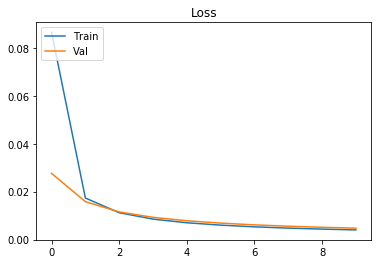

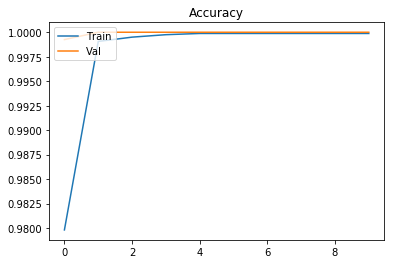

In [14]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

## On réalise nos premières prédictions sur des exemples évidents

In [15]:
datas_tests = np.array([[2,2],[-2,-2]])
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c[index_max(list(el))])
    
res
    

[[4.8198499e-04 9.9951804e-01]
 [9.9968565e-01 3.1440982e-04]]


['green', 'red']

## Sur des exemples moins évidents 
## le modèle donne un résultat mais peu fiable 
## ce qui est normal puisque l'on se trouve aux limites du modèle

In [16]:
c2 = ['darkred','chartreuse']

datas_tests = np.array([[0,0],[2,-2],[4,-4]])
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c2[index_max(list(el))])
    
res

[[0.5532207  0.44677937]
 [0.93786484 0.06213521]
 [0.9945944  0.00540563]]


['darkred', 'darkred', 'darkred']

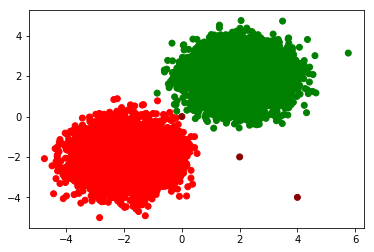

In [17]:
abstest = [ data[0] for data in datas_tests]
ordstest = [ data[1] for data in datas_tests]
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.scatter(abstest,ordstest, color = res)
plt.show()

### Exercice:

Créer un jeu de 2000 données de test comprenant datas et labels, pour tester le modèle précédent

In [98]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = np.random.normal(0,1)
    abss.append(x)
    y = np.random.normal(0,1)
    ords.append(y)
    datas.append([x,y])
    if x >= 0:
        labels.append(0)
    else:
        labels.append(1)
        
datas = np.array(datas)

loss, acc = model.evaluate(datas, labels)
print("Test Loss", loss)
print("Test Accuracy", acc)

1000/1000 [==============================] - 0s 26us/sample - loss: 1.2785 - acc: 0.4680
Test Loss 1.278464973449707
Test Accuracy 0.468


[[2.2426461e-01 7.7573544e-01]
 [6.6334993e-01 3.3665007e-01]
 [5.5594426e-02 9.4440556e-01]
 ...
 [6.1385319e-05 9.9993861e-01]
 [9.9805802e-01 1.9419832e-03]
 [6.0001228e-05 9.9994004e-01]]


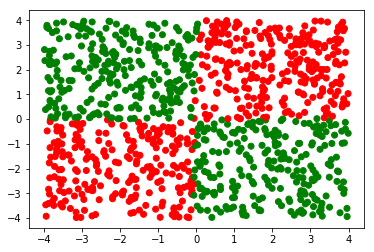

In [99]:

model_output = model.predict(datas_test)
print(model_output)
Colors = [c[index_max(list(model))] for model in model_output]

abstest = [ data[0] for data in datas_test]
ordstest = [ data[1] for data in datas_test]

plt.scatter(abstest,ordstest,color=Colors)

plt.show()


## -----------------------------------------------------------------------
## Création d'un second réseau de neurones

Le code ci-dessous est le code Python permettant de créer un réseau de neurones avec 2 populations séparées différemment (Exclusive Or)

### Essayons avec des données un peu moins bien réparties

## Création des données d'entraînement

In [67]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    if x*y >= 0:
        labels.append(0)
    else:
        labels.append(1)
        
datas = np.array(datas)

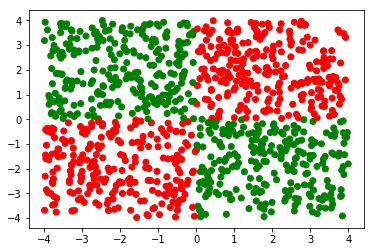

In [68]:
c = ['red','green']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

## Création du modèle

In [87]:
# model creation
model = tf.keras.models.Sequential()

### Ajout des couches de neurones
Il va falloir ajouter une couche de neurones pour complexifier notre modèle, sinon on n'arrivera jamais à obtenir un résultat satisfaisant.

In [81]:
# Add the layers
model.add(tf.keras.layers.Dense(4, activation="relu"))  # si vous avez tester, 4 suffisent pour obtenir un bon résultat
model.add(tf.keras.layers.Dense(2, activation="softmax"))  

## Exemple de prédiction sans entraînement

In [90]:
# output example
print(datas[0:1])
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", c[index_max(list(model_output[0]))])
print("Should be : ", c[labels[0:1][0]])

[[-1.04817321  2.70317235]]
[[0.71245337 0.28754663]]
Found :  red
Should be :  green


## Résumé du modèle (couches de neurones)

In [91]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              multiple                  36        
_________________________________________________________________
dense_10 (Dense)             multiple                  26        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [92]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

## Entraînement

In [85]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 0s 333us/sample - loss: 0.7672 - acc: 0.5200 - val_loss: 0.6873 - val_acc: 0.6100
Epoch 2/10
800/800 [==============================] - 0s 125us/sample - loss: 0.6186 - acc: 0.7150 - val_loss: 0.5884 - val_acc: 0.7350
Epoch 3/10
800/800 [==============================] - 0s 124us/sample - loss: 0.5350 - acc: 0.8500 - val_loss: 0.5267 - val_acc: 0.8300
Epoch 4/10
800/800 [==============================] - 0s 110us/sample - loss: 0.4784 - acc: 0.9087 - val_loss: 0.4809 - val_acc: 0.8950
Epoch 5/10
800/800 [==============================] - 0s 113us/sample - loss: 0.4348 - acc: 0.9413 - val_loss: 0.4446 - val_acc: 0.9300
Epoch 6/10
800/800 [==============================] - 0s 117us/sample - loss: 0.3999 - acc: 0.9613 - val_loss: 0.4151 - val_acc: 0.9400
Epoch 7/10
800/800 [==============================] - 0s 117us/sample - loss: 0.3714 - acc: 0.9688 - val_loss: 0.3907 - val_acc: 0.9650
Ep

## Le modèle est-il bien entraîné ?

In [75]:
datas_test = []
labels_test = []


nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    y = 8 * rd.random() - 4
    datas_test.append([x,y])
    if x*y >= 0:
        labels_test.append(0)
    else:
        labels_test.append(1)
        
datas_test = np.array(datas_test)

In [76]:
loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

1000/1000 [==============================] - 0s 81us/sample - loss: 0.1208 - acc: 0.9820
Test Loss 0.12081593990325928
Test Accuracy 0.982


### Exercice: 
Le résultat n'est pas très satisfaisant. Proposez deux façons d'améliorer la prédiction.

In [93]:
history = model.fit(datas, labels, epochs=100, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 0s 384us/sample - loss: 0.8895 - acc: 0.2225 - val_loss: 0.7347 - val_acc: 0.3000
Epoch 2/100
800/800 [==============================] - 0s 93us/sample - loss: 0.6528 - acc: 0.6725 - val_loss: 0.5821 - val_acc: 0.8600
Epoch 3/100
800/800 [==============================] - 0s 129us/sample - loss: 0.5309 - acc: 0.9025 - val_loss: 0.5044 - val_acc: 0.8850
Epoch 4/100
800/800 [==============================] - 0s 125us/sample - loss: 0.4590 - acc: 0.9325 - val_loss: 0.4550 - val_acc: 0.8900
Epoch 5/100
800/800 [==============================] - 0s 183us/sample - loss: 0.4098 - acc: 0.9375 - val_loss: 0.4176 - val_acc: 0.9000
Epoch 6/100
800/800 [==============================] - 0s 126us/sample - loss: 0.3721 - acc: 0.9438 - val_loss: 0.3873 - val_acc: 0.9100
Epoch 7/100
800/800 [==============================] - 0s 125us/sample - loss: 0.3417 - acc: 0.9500 - val_loss: 0.3622 - val_acc: 0.9

800/800 [==============================] - 0s 111us/sample - loss: 0.1070 - acc: 0.9925 - val_loss: 0.1366 - val_acc: 0.9900
Epoch 61/100
800/800 [==============================] - 0s 105us/sample - loss: 0.1062 - acc: 0.9900 - val_loss: 0.1356 - val_acc: 0.9900
Epoch 62/100
800/800 [==============================] - 0s 65us/sample - loss: 0.1053 - acc: 0.9937 - val_loss: 0.1346 - val_acc: 0.9900
Epoch 63/100
800/800 [==============================] - 0s 93us/sample - loss: 0.1044 - acc: 0.9925 - val_loss: 0.1336 - val_acc: 0.9900
Epoch 64/100
800/800 [==============================] - 0s 112us/sample - loss: 0.1035 - acc: 0.9925 - val_loss: 0.1326 - val_acc: 0.9900
Epoch 65/100
800/800 [==============================] - 0s 99us/sample - loss: 0.1027 - acc: 0.9912 - val_loss: 0.1317 - val_acc: 0.9900
Epoch 66/100
800/800 [==============================] - 0s 65us/sample - loss: 0.1019 - acc: 0.9925 - val_loss: 0.1307 - val_acc: 0.9900
Epoch 67/100
800/800 [=============================

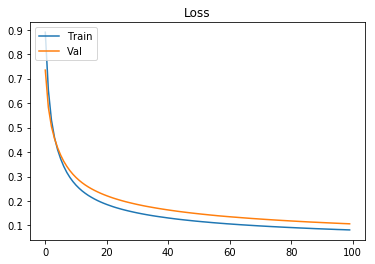

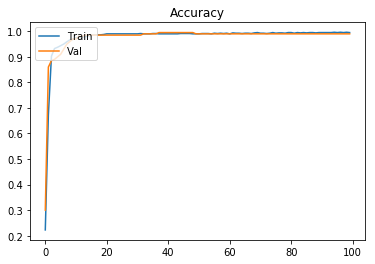

In [94]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [88]:
# Add the layers
model.add(tf.keras.layers.Dense(12, activation="relu"))  # si vous avez tester, 4 suffisent pour obtenir un bon résultat
model.add(tf.keras.layers.Dense(2, activation="softmax"))  

## Troisième réseau de neurones

### sur un exemple encore plus tordu... avec 3 populations

## A vous de jouer

In [18]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    norm_carre = x**2 + y**2
    if norm_carre <= 4:
        labels.append(0)
    elif norm_carre <= 8:
        labels.append(1)
    else:
        labels.append(2)
        
datas = np.array(datas)

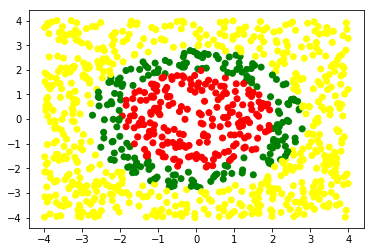

In [19]:
c = ['red','green','yellow']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

### Construire un réseau de neurones correspondant

In [20]:
model = tf.keras.models.Sequential()

# Add the layers
model.add(tf.keras.layers.Dense(4, activation="relu"))  # si vous avez tester, 4 suffisent pour obtenir un bon résultat
model.add(tf.keras.layers.Dense(2, activation="softmax"))  

In [21]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

In [ ]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

In [12]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()